# CMSE 802 In-class assignment: Machine Learning Part 2
## Date: 11/06/2018
## Due: 11/06/2018; 10:30 PM

### The goal of this assignment is to do feature selection using Principal Component Analysis and use it to improve classification.


<img src="http://lazyprogrammer.me/wp-content/uploads/2015/11/PCA.jpg" width="400"><a href="http://lazyprogrammer.me/tutorial-principal-components-analysis-pca//"><p style="text-align: right;">
Image from http://lazyprogrammer.me/
</p></a>

---
### Your name: Boyao Zhu

---

### 1. Example Application of PCA: The Iris data set

The iris dataset contains measurements for 150 iris flowers from three different species. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

import sklearn
import sklearn.decomposition as dec
import sklearn.datasets as ds


# Let us load the data set

iris = ds.load_iris()
data = iris.data
target = iris.target

print(data.shape)
print(target)

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The three classes in the Iris dataset are represented by numbers in the 'target' vector:

    1. Iris-setosa (n=50)
    2. Iris-versicolor (n=50)
    3. Iris-virginica (n=50)

There are four measurements (features) for each flower in the  'data' matrix:    
    1. sepal length in cm
    2. sepal width in cm
    3. petal length in cm
    4. petal width in cm
    
Example:
![Image of flower](http://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/master/Images/iris_petal_sepal.png)

### Step A: Visualize the features by plotting them.

(1) Pick two features out of the four and plot the data in 2D. (2) Pick three features out of the four and plot the data in 3D. 

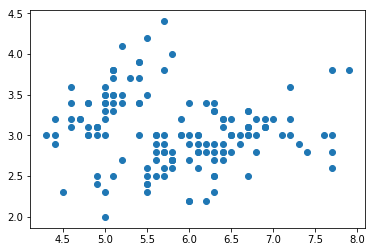

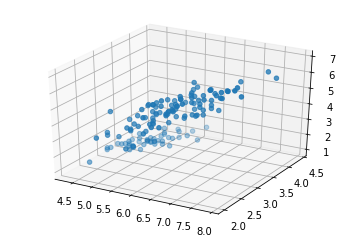

In [6]:
# Your code:
import matplotlib.pyplot as plt

a = data[:,0]
b = data[:,1]
plt.scatter(a,b)
plt.show()

from mpl_toolkits.mplot3d import Axes3D
c = data[:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a, b, c)



### Step B: Transform the data in terms of its principal components.
Now we will use a PCA algorithm. Fortunately there is a simple PCA function available in the sklearn module. 

In [19]:
# Your code:
pca = dec.PCA(n_components = 4)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Out of curiosity. print the eigenvalues.  Remember from the pre-class video that low eigenvalues indicate less information. Big eigenvalues indicate more information.

In [20]:
print(pca.explained_variance_)

[4.22484077 0.24224357 0.07852391 0.02368303]


### Step C: Now plot the transformed data in terms of its first two principal components

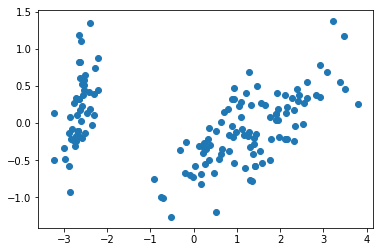

In [21]:
# Your code:
a = pca.transform(data)

plt.scatter(a[:,0], a[:,1])

**Question:**  Describe in words the differences between the graphs from Step A and Step C.  They are representing the same data.  Why would we prefer to use the features in step C?

**Your answer: ** graph in step A represents data distribute in x-y plane, while step C represents the same data, which is projecting to its pricipal and secondary axis.  We prefer step C because it use PCA which is a method that rotates the dataset in such a way that the rotated features are statistically uncorrelated.

---
### 2. Continue Machine Learning for Face Recognition 

We will follow the similar procedures as in the previous in-class assignment, but this time we will use PCA for the data. Add the PCA part to our previous code, train and test using the data after PCA, and evaluate the accuracy. 

### Copy and paste your code in the previous in-class assignment (machine learning Day19) and modify the code with addition of PCA functions. 

### Step A: Download the dataset

In [95]:
# Your code:
%matplotlib inline
import matplotlib.pylab as plt

import numpy as np
from sklearn.datasets import fetch_lfw_people, load_digits

sk_data = load_digits();
sk_data = fetch_lfw_people(min_faces_per_person=50, resize=0.3)

from ipywidgets import interact
def browse_images(images, labels, categories):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], cmap='gray', interpolation='nearest')
        plt.title('%s' % categories[labels[i]])
        plt.axis('off')
        plt.show()
    interact(view_image, i=(0,n-1))
browse_images(sk_data.images, sk_data.target, sk_data.target_names)

feature_vectors = sk_data.data
class_labels = sk_data.target
categories = sk_data.target_names

n_samples, n_features = feature_vectors.shape
N, h, w = sk_data.images.shape
n_classes = len(categories)

print(n_samples)
print(n_features)
print(n_classes)
print(N)
print (h)
print(w)

print (feature_vectors)
print (class_labels)
print (categories)

interactive(children=(IntSlider(value=779, description='i', max=1559), Output()), _dom_classes=('widget-intera…

1560
1036
12
1560
37
28
[[ 85.333336 101.666664 102.       ... 102.333336 135.66667  126.333336]
 [ 47.666668  79.666664  88.666664 ...  72.666664  81.666664 107.333336]
 [ 74.333336  57.666668  65.       ... 179.33333  138.66667   91.      ]
 ...
 [ 55.666668  81.666664  83.       ... 194.       187.       169.      ]
 [145.33333  164.33333  173.66667  ... 232.       230.66667  226.66667 ]
 [ 29.        31.        43.666668 ...  46.666668  31.        50.666668]]
[11  4  2 ...  3 11  5]
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']


### Step B: Splitting the dataset for model development (trainning) and evaluation (testing).


In [107]:
# Your code:
from sklearn.model_selection import train_test_split
train_vectors, test_vectors, train_labels, test_labels = train_test_split(sk_data['data'], sk_data["target"],random_state=1)

print(train_vectors.shape)
print(test_vectors.shape)


(1170, 1036)
(390, 1036)


### C. Add PCA functions

** To train a model we will first reduce the dimensionality of the original picture to a 4 PCA space. This is often called unsupervised feature extraction. **

In [127]:
# Your code: 
# You should use RandomizedPCA and set whiten = True to increase the accuracy of eigenvalues/eigenvector solver.
from sklearn.decomposition import RandomizedPCA
n_components = 64

pca = RandomizedPCA(n_components = n_components, whiten = True)
pca.fit(train_vectors)




/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


RandomizedPCA(copy=True, iterated_power=2, n_components=64, random_state=None,
       whiten=True)

### Reshape the resulting eigenvectors back to images and imshow them. These images are so-called eigenfaces.

In [128]:
eigenfaces = pca.components_.reshape((n_components, h, w))
pca.components_.shape
#sklearn.__version__

(64, 1036)

Notice that the length of these new vectors are the same size as the original data. Let's plot the gallery of the most significant eigenfaces:

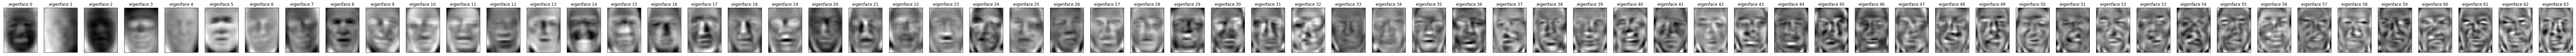

In [130]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap='gray')
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
    plt.show()
        
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, n_row=1, n_col=64)

**Question: ** Describe in your words what is the meaning of eigenfaces. 

**Your answer: ** The eigenface are derived from the covariance matrix of the largest probability distribution over the high-dimensional vector space of face images

### D. PCA transform the datasets

In [131]:
# Your code:
train_vectors_t = pca.transform(train_vectors)
print (train_vectors_t.shape)
test_vectors_t = pca.transform(test_vectors)
print (test_vectors_t.shape)

(1170, 64)
(390, 64)


### Step E: Train an SVM Classifier based on the training dataset.

In [132]:
# Your code:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

#make some temporary variablse so you can change this easily
tmp_vectors = train_vectors_t
tmp_labels = train_labels

print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)


Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### Step F: Show the results of the classification on the testing dataset.

In [133]:
# Your code:

predict_vectors = test_vectors_t
true_lables = test_labels

print("Predicting people's names on the test set")
pred_labels =  clf.predict(test_vectors_t)# <== fill the blank

print(classification_report(true_lables, pred_labels))
print(confusion_matrix(true_lables, pred_labels, labels=range(n_classes)))

print(clf.score(test_vectors_t, test_labels))

Predicting people's names on the test set
             precision    recall  f1-score   support

          0       0.82      0.78      0.80        18
          1       0.92      0.91      0.91        65
          2       0.68      0.86      0.76        22
          3       0.86      0.94      0.90       141
          4       0.88      0.68      0.77        22
          5       0.83      0.75      0.79        20
          6       0.88      0.78      0.82         9
          7       0.91      0.71      0.80        14
          8       0.82      0.82      0.82        11
          9       0.94      0.89      0.92        19
         10       1.00      0.75      0.86        12
         11       0.79      0.73      0.76        37

avg / total       0.86      0.86      0.86       390

[[ 14   0   1   2   0   0   0   1   0   0   0   0]
 [  0  59   0   3   0   0   0   0   1   0   0   2]
 [  1   0  19   1   0   0   0   0   0   0   0   1]
 [  0   2   3 133   1   1   0   0   0   0   0   1]
 [  1   0

### G. Plot the Results of face recognition. 

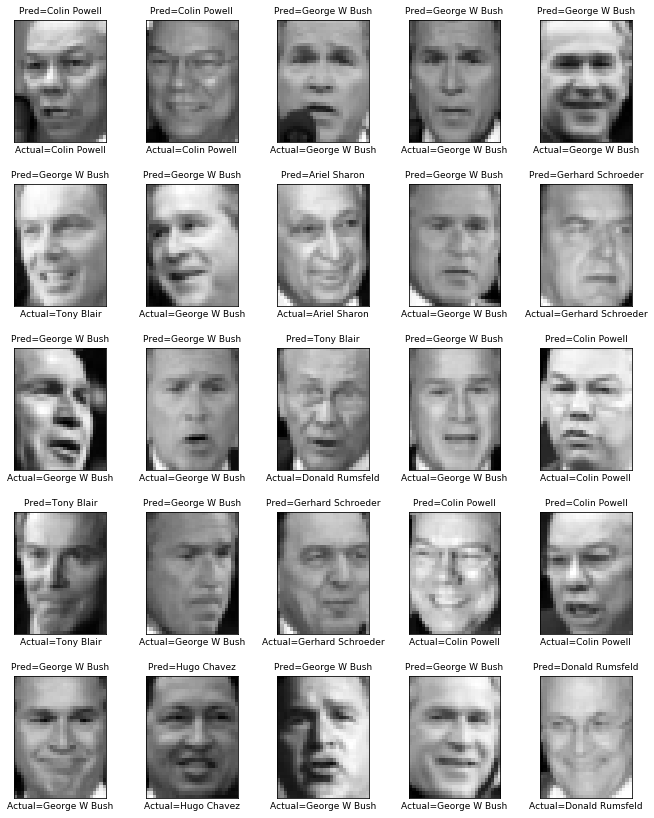

In [134]:
# Your code:
def plot_gallery(images, true_titles, pred_titles, h, w, n_row=5, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap='gray')
    
        plt.title('Pred='+str(categories[pred_titles[i]]), size=9)
        plt.xlabel('Actual='+str(categories[true_titles[i]]), size=9)
        plt.xticks(())
        plt.yticks(())

plot_gallery(test_vectors, test_labels, pred_labels, h,w)

** Question: ** What is the overall precision of the algorithm When selecting 4 eigenvectors. 

**Your answer: ** 22%

** Question: ** What is the overall precision of the algorithm When selecting 40 eigenvectors? 64?

**Your answer: **

40 eigenvectors: 0.8205128205128205

64 eigenvectors: 0.8564102564102564

---
### Congratulations, we're done!

** Don't forget to add your names to the top!!**

Log into the course D2L website (d2l.msu.edu) and go to "Assessments > Assignments > In-class Assignment 20181106".